Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

1.DATA LOAD AND CLEANING

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [6]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('marketing_data.csv')
creditcard_df.head(5)

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points  

What is the average, minimum and maximum "BALANCE" amount?


In [10]:
print('The average, minimum and maximum balance amount are:', creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

The average, minimum and maximum balance amount are: 1564.4748276781006 0.0 19043.13856


In [11]:
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [13]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [14]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [15]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


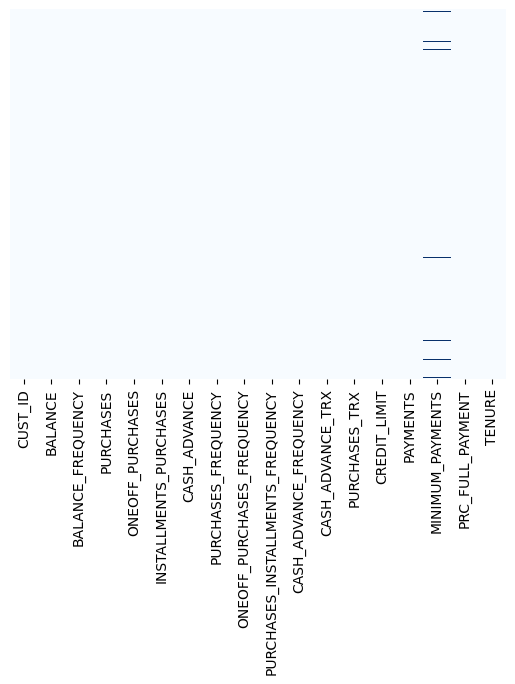

In [16]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()


In [17]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [20]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

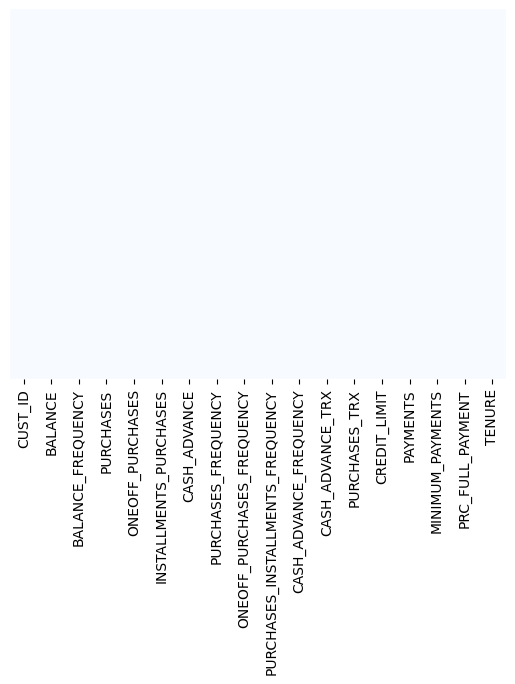

In [21]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [22]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [24]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [25]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
n = len(creditcard_df.columns)
n

17

In [27]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

2. EXPLORATORY DATA ANALYSIS (EDA)

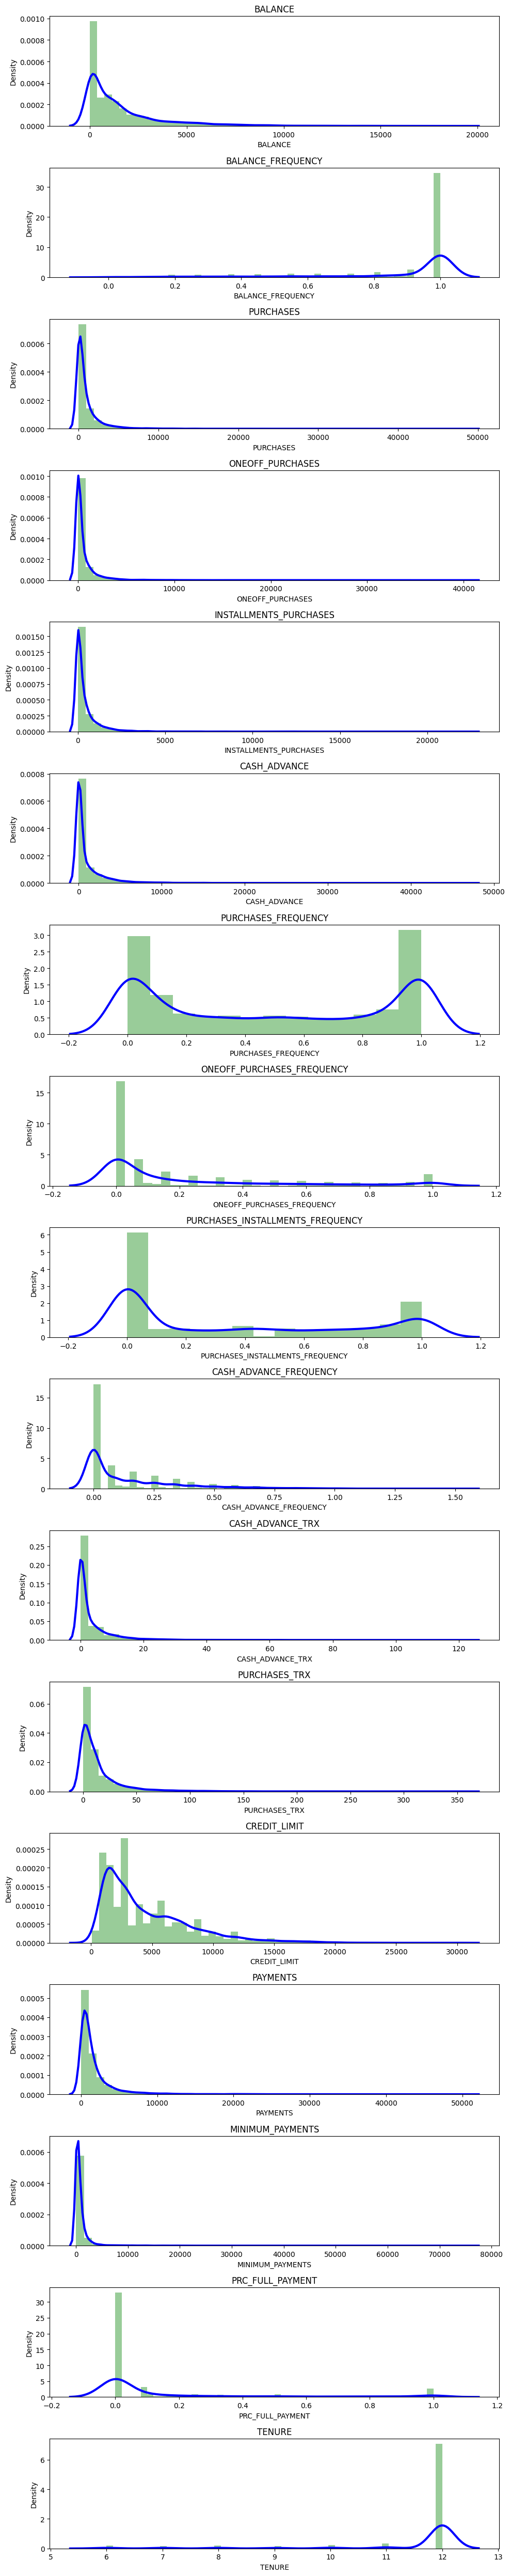

In [29]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

- Obtain the correlation matrix between features

In [31]:
correlations = creditcard_df.corr()

<Axes: >

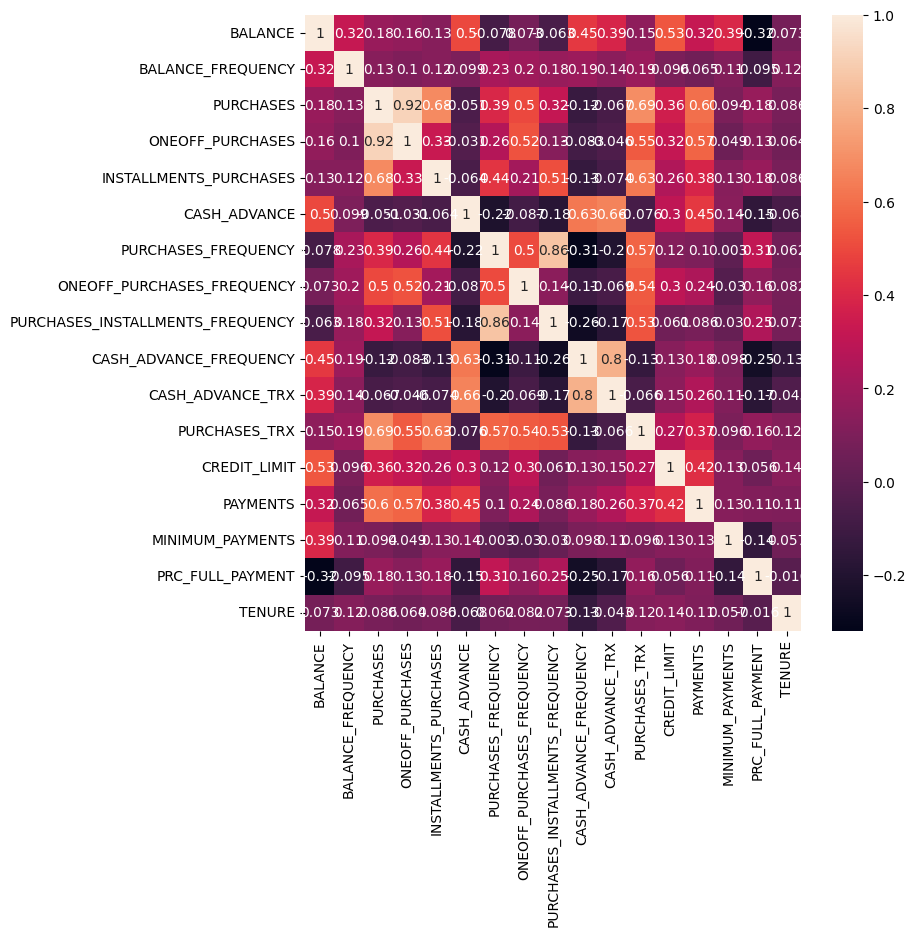

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlations, annot = True)

- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


1. K-means terminates after a fixed number of iterations is reached
2. K-means terminates when the centroid locations do not change between iterations

### FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

3.DATA PREPROCESSING

In [38]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [39]:
creditcard_df_scaled.shape

(8950, 17)

In [40]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [41]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')



# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

4. K-MEANS CLUSTERING
 Explanation: Why clustering?

goal is customer segmentation, not prediction.

There are no labels, so supervised models like Logistic Regression, Random Forest, or SVM cannot be applied.

K-Means is fast, interpretable, and gives centroids, which are useful to describe "typical customers" in each segment.

Alternative clustering methods:

Hierarchical → too slow for large dataset

DBSCAN → good for density-based clusters, but we want clear, business-interpretable centroids

 Initialize KMeans with 7 clusters
 Question: Why K-Means? Why 7 clusters?
 Answer: This project is about **unsupervised segmentation of customers**. 
 There are no labels like "VIP" or "High Spender". So, **supervised models cannot be used**.
 K-Means helps group customers based on similarity in features.
 We chose 7 clusters based on business knowledge or exploration (e.g., 7 distinct customer segments we want to study).


 Fit KMeans to the scaled data
 Question: Why fit on scaled data?
 Answer: K-Means uses **Euclidean distance** to assign points to clusters. Features like BALANCE (0-10000) vs PURCHASES_FREQUENCY (0-1) have very different ranges.
 Scaling ensures **all features contribute equally**.


 Extract cluster labels
 Question: Why get labels?
 Answer: Labels tell which cluster each customer belongs to. 
 We can then analyze each cluster to understand behavior patterns.

In [45]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

 Check cluster centers shape
 Question: Why check cluster centers?
 Answer: Cluster centers are the "average" customer of each cluster in scaled feature space.
This helps interpret what each cluster represents.

In [47]:
kmeans.cluster_centers_.shape

(7, 17)

Convert cluster centers to DataFrame
 Question: Why convert to DataFrame?
 Answer: Easier to read and interpret cluster centers, see which features are high/low per cluster.

In [49]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.596464,0.401917,-0.233213,-0.170302,-0.238634,1.858753,-0.516121,-0.226813,-0.453393,1.826541,1.800397,-0.283909,0.941269,0.741345,0.546788,-0.403021,0.089297
1,-0.187810,-0.203219,-0.343648,-0.222095,-0.404428,-0.163055,-0.836771,-0.358622,-0.768980,-0.065644,-0.130802,-0.476408,-0.295265,-0.240602,-0.090935,-0.408736,0.269832
2,1.410980,0.414656,7.077361,6.236596,5.273896,0.035821,1.087025,1.891663,1.045609,-0.248755,-0.045397,4.740816,2.161408,4.882121,1.088164,0.830765,0.333341
3,0.232282,0.452763,1.045575,0.981852,0.668423,-0.282983,1.120948,1.902941,0.613141,-0.373014,-0.294756,1.330510,0.766390,0.452455,-0.017530,0.311012,0.303557
4,-0.336727,-0.460023,-0.291679,-0.206014,-0.310809,0.064192,-0.266930,-0.276511,-0.292892,0.303461,-0.002503,-0.399324,-0.555692,-0.393035,-0.202274,-0.102452,-3.169145
5,-0.711419,-0.402345,-0.076903,-0.204898,0.194193,-0.444664,0.547209,-0.213412,0.553647,-0.642988,-0.455740,-0.044409,-0.056652,-0.200099,-0.297287,2.207825,0.130121
6,-0.259630,0.219548,-0.057320,-0.207494,0.245716,-0.339419,0.922825,-0.266747,1.083504,-0.419770,-0.328246,0.168357,-0.313510,-0.220218,0.050072,-0.304030,0.277379


 Inverse transform cluster centers to original scale
 Question: Why inverse transform?
 Answer: Cluster centers are currently in **scaled units**, not dollars/frequencies.
 Inverse transform converts them back to **interpretable units**.

In [51]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4887.379374,0.972481,504.942435,309.770845,195.273873,4876.762673,0.283206,0.134795,0.184247,0.500654,15.535211,7.652918,7919.169563,3879.265189,2138.473129,0.035838,11.636821
1,1173.564870,0.829130,268.994522,223.805358,45.348828,636.937306,0.154514,0.095474,0.058825,0.122008,2.356197,2.868119,3420.155039,1036.624405,652.285346,0.034166,11.878422
2,4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
3,2047.950507,0.984526,3237.092267,2222.111218,1015.514382,385.441855,0.940241,0.770142,0.608115,0.060500,1.237333,47.781333,7282.888889,3042.957441,823.352755,0.244680,11.923556
4,863.606315,0.768296,380.027619,250.496714,130.007095,1113.485458,0.383219,0.119969,0.248035,0.195870,3.231746,4.784127,2472.615528,595.345563,392.814718,0.123749,7.276190
5,83.715473,0.781959,838.899423,252.348468,586.674129,46.389546,0.709972,0.138793,0.584471,0.006476,0.138735,13.605993,4288.327279,1153.878070,171.391969,0.799466,11.691454
6,1024.076553,0.929280,880.738929,248.039978,633.265453,267.093002,0.860725,0.122882,0.795049,0.051144,1.008786,18.894563,3353.773041,1095.634495,980.896894,0.064791,11.888523


In [52]:
labels.shape # Labels associated to each data point

(8950,)

In [53]:
labels.max()

6

In [54]:
labels.min()

0

In [55]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([2, 3, 0, ..., 0, 2, 2])

Add cluster labels as a new column in original DataFrame
Question: Why add cluster labels to original DataFrame?
Answer: So we can analyze each customer along with their cluster. 
E.g., we can calculate **average BALANCE per cluster** or **number of VIP customers**.

In [57]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


After clustering, each row (customer) now has a cluster assignment.

This allows segment-wise analysis, plots, and insights.

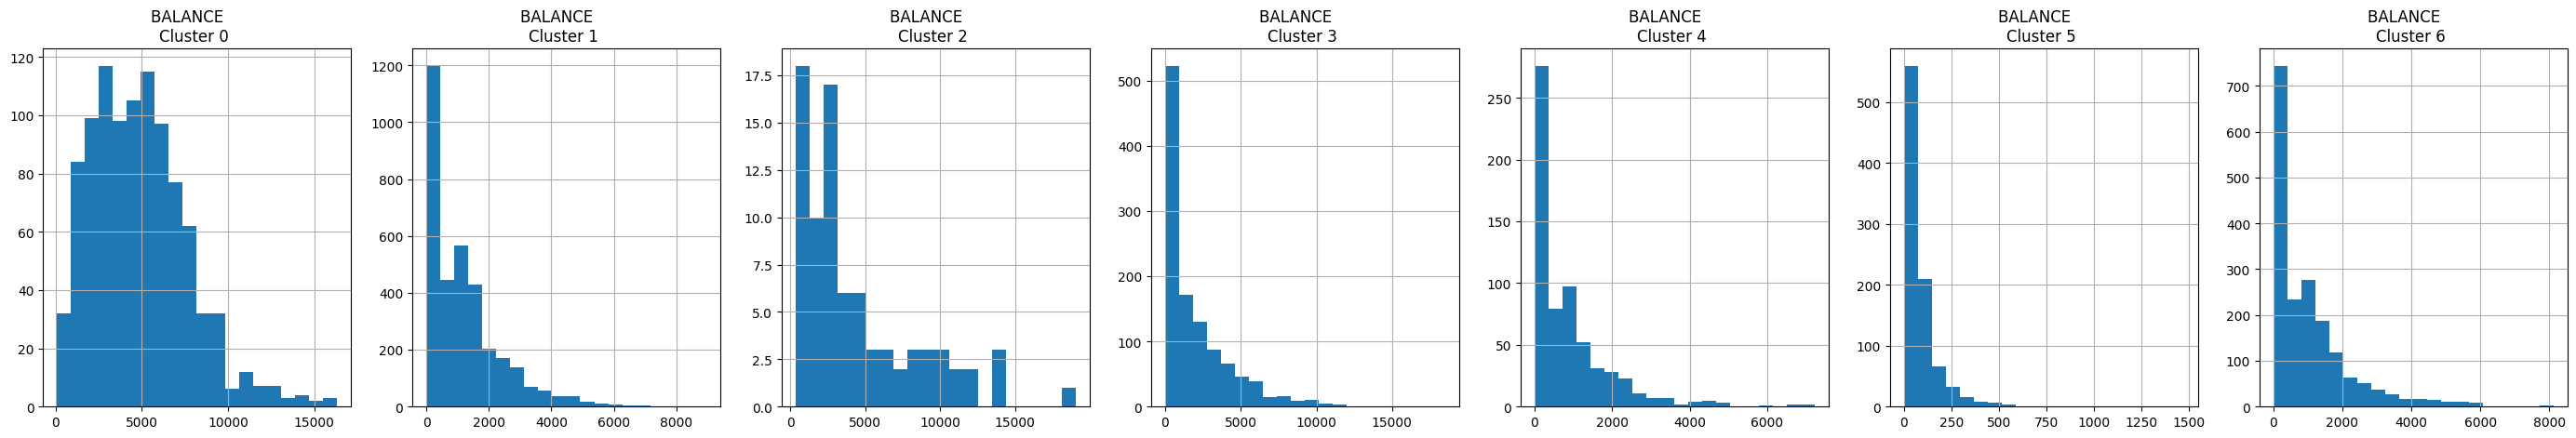

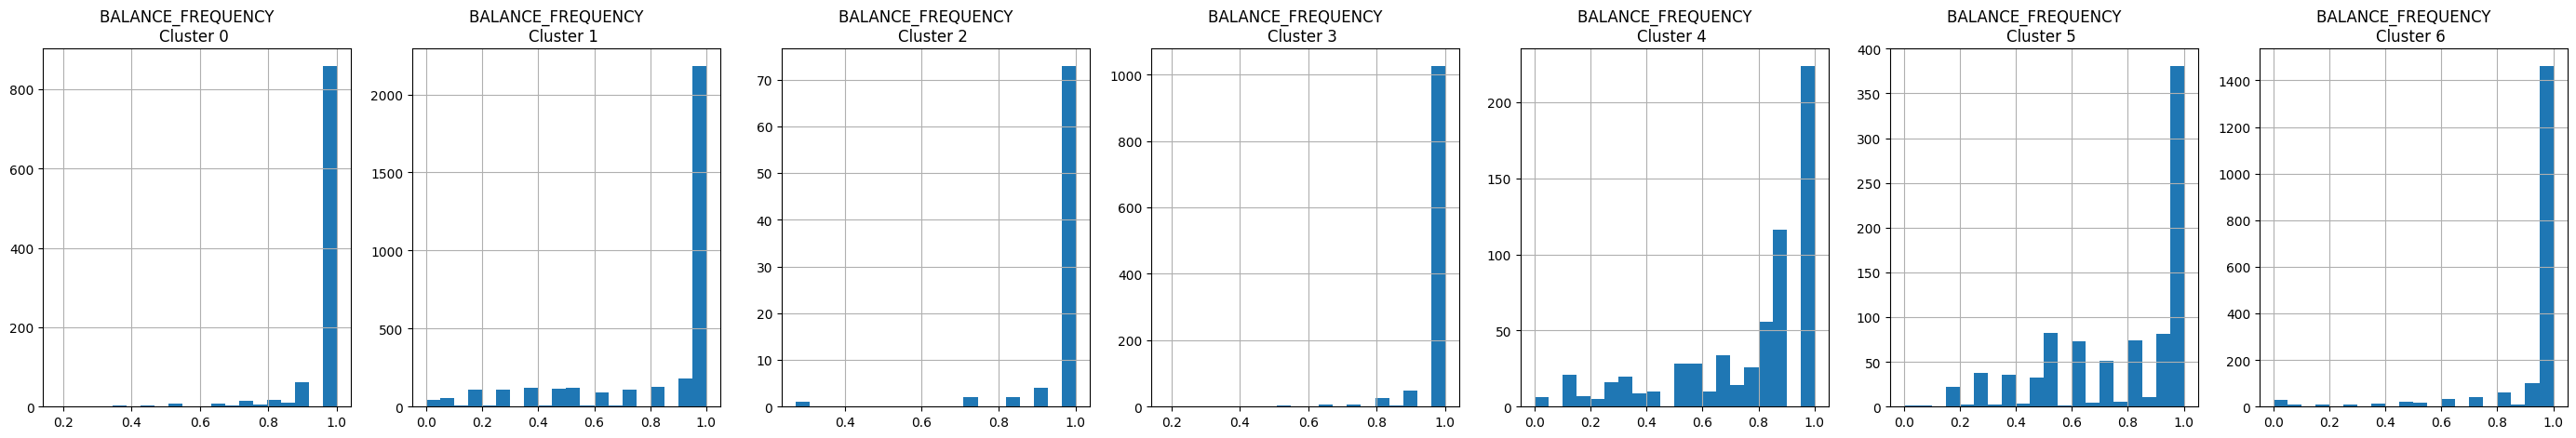

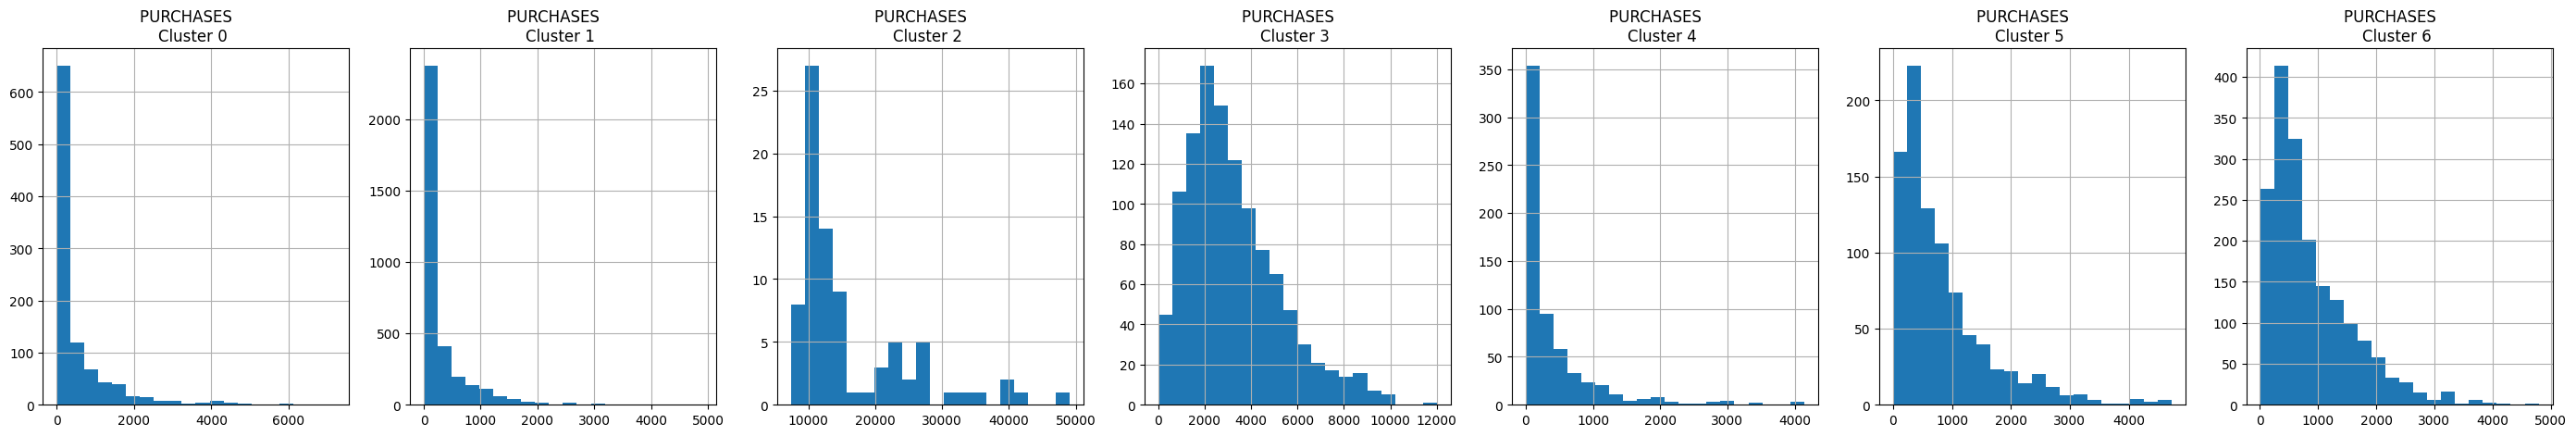

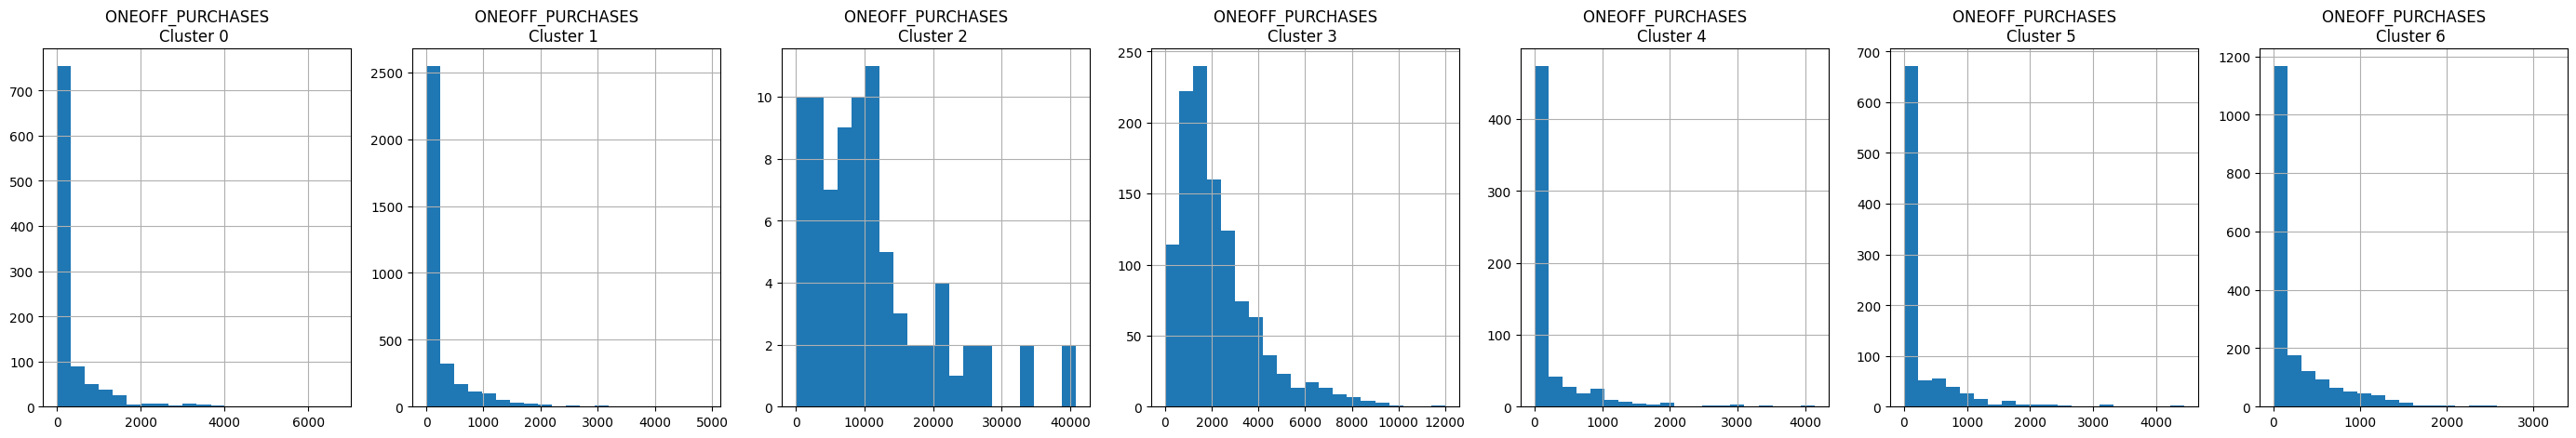

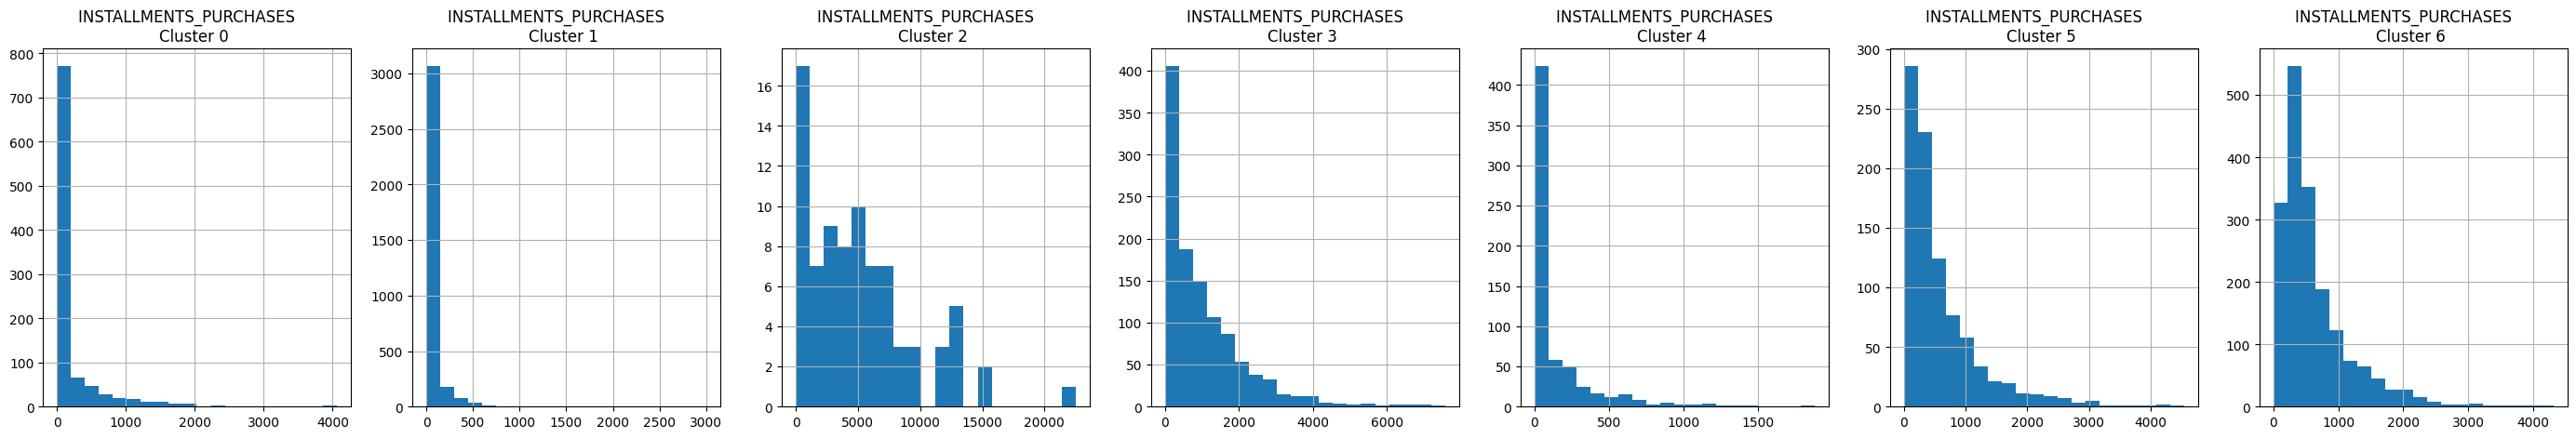

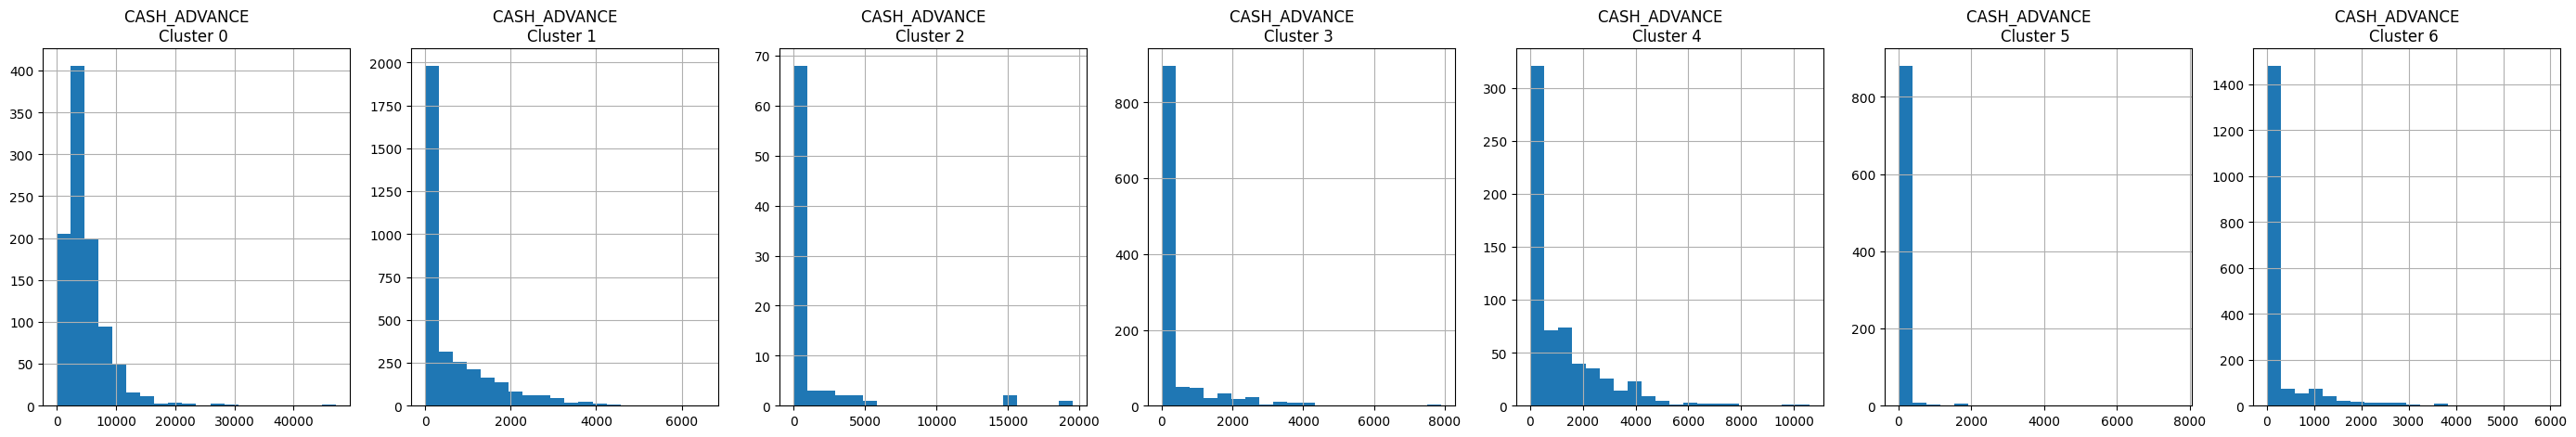

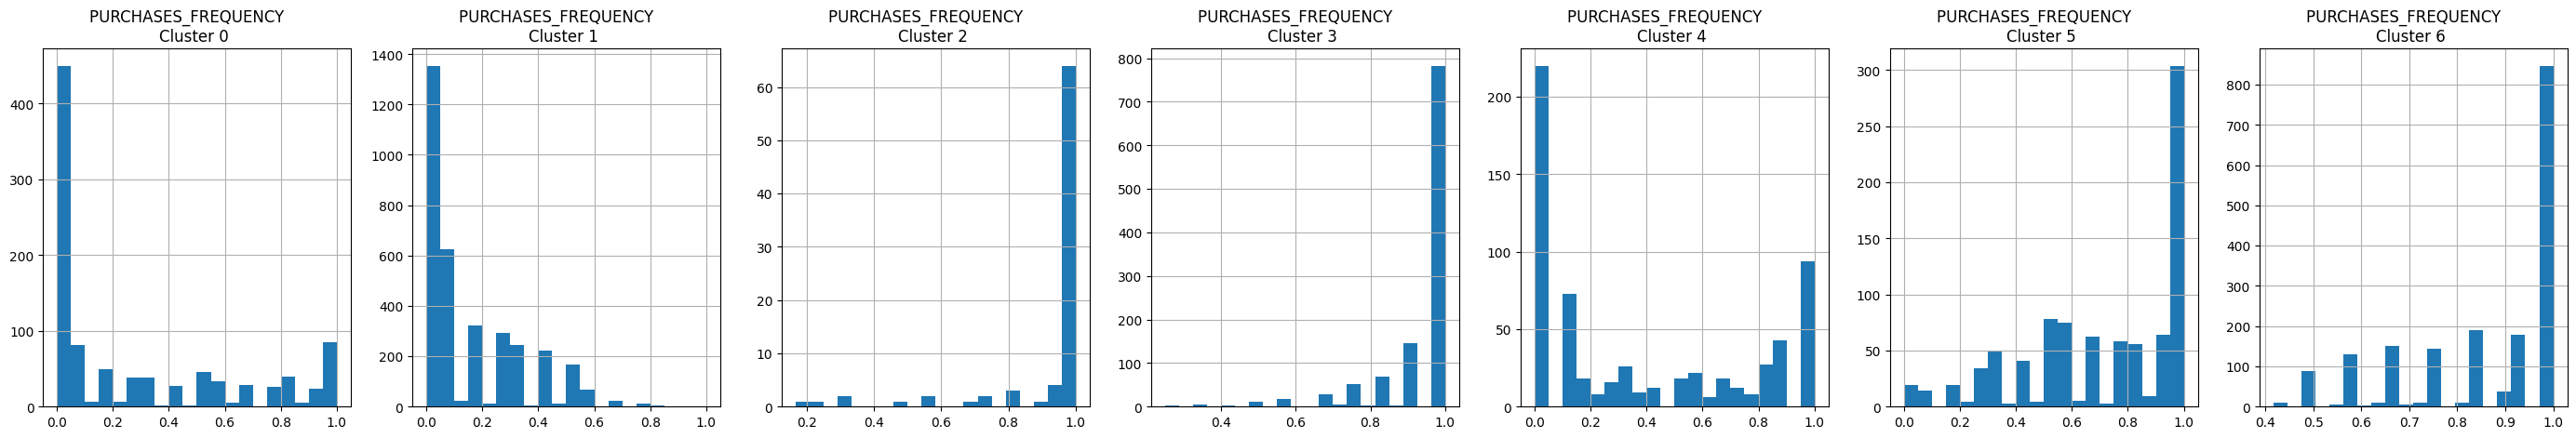

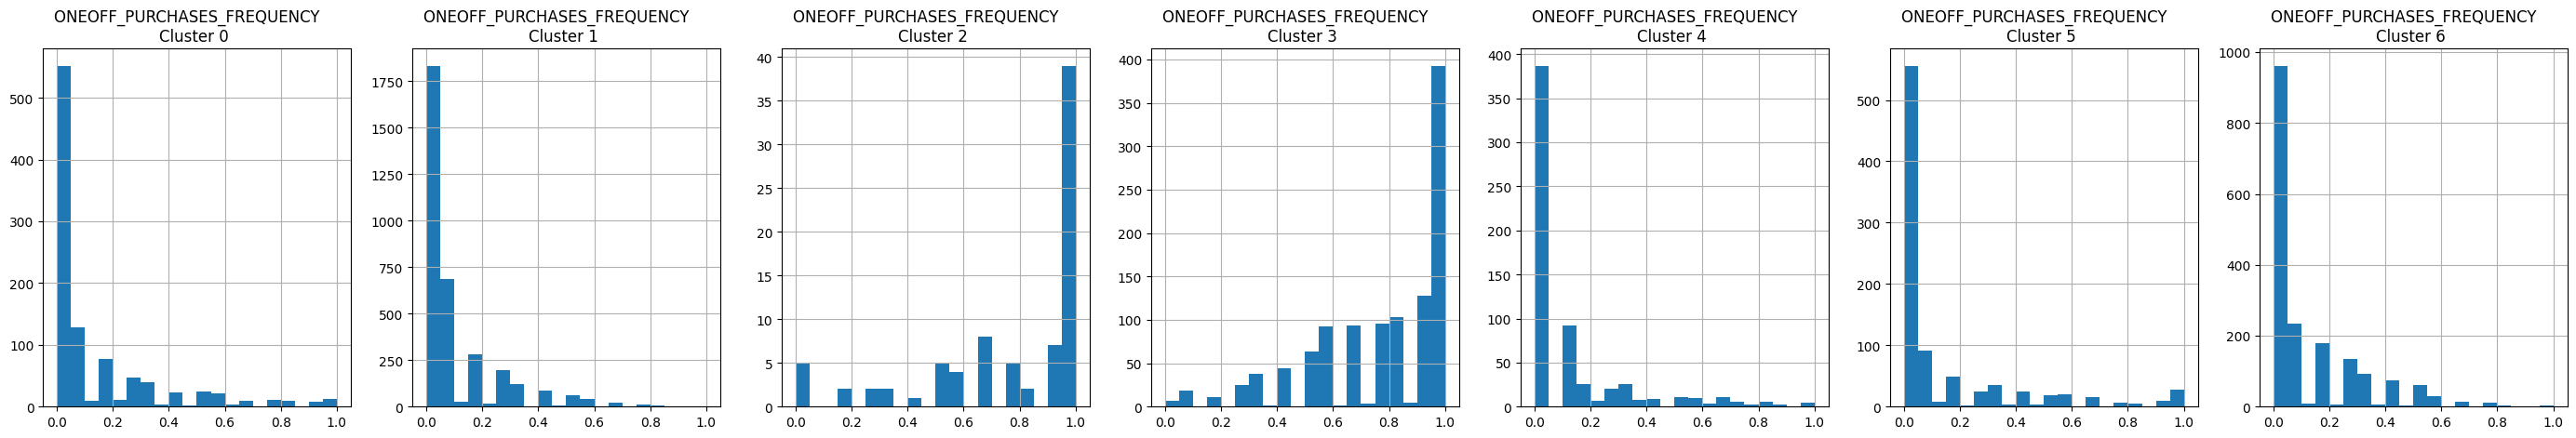

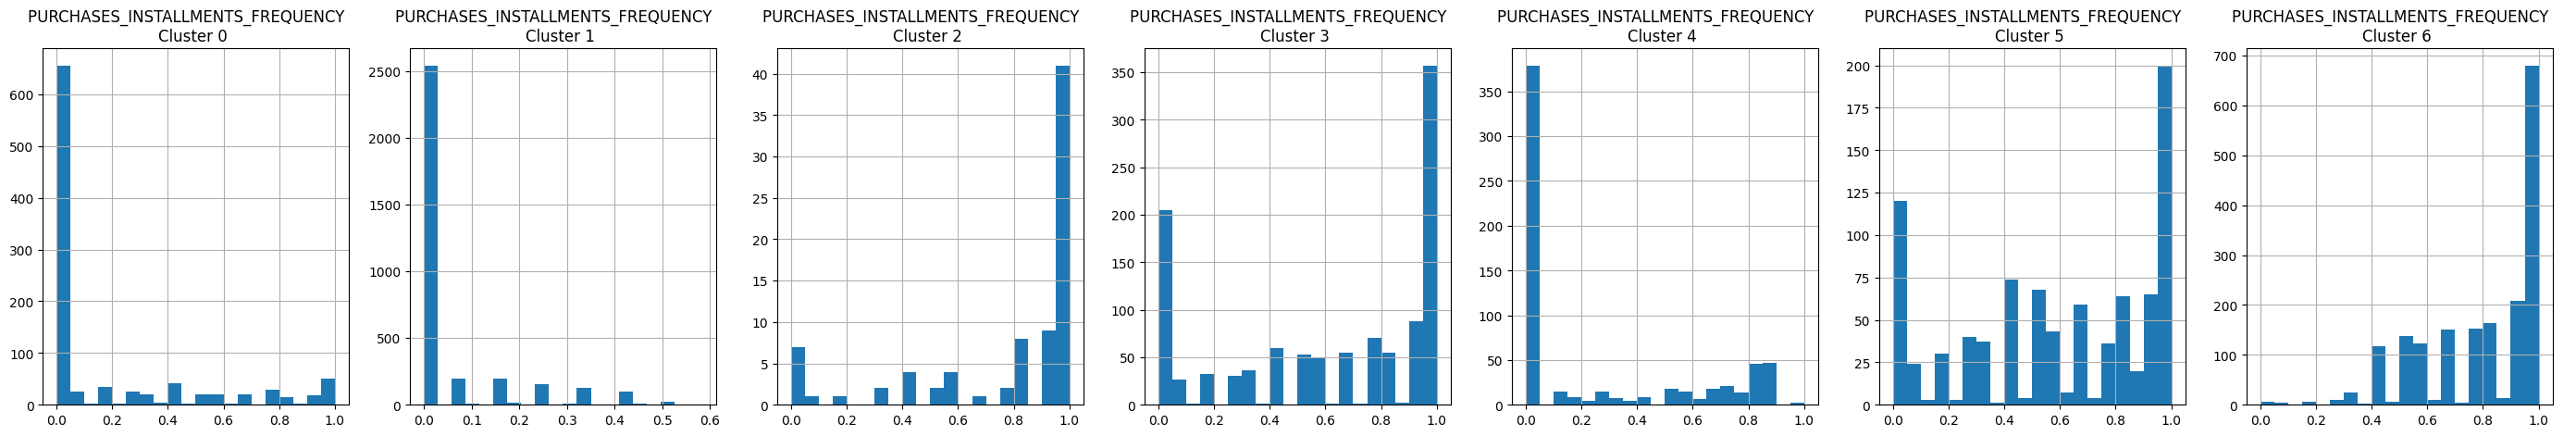

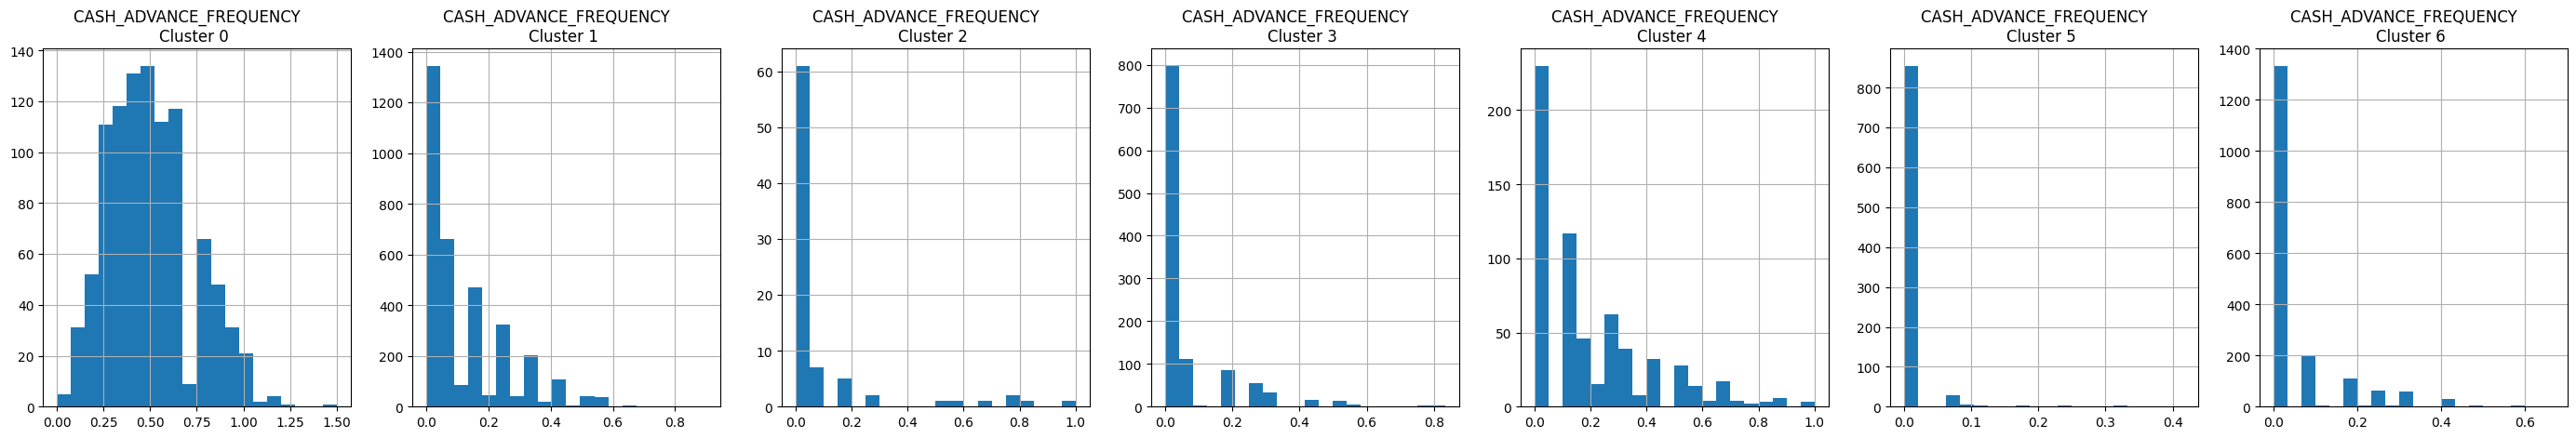

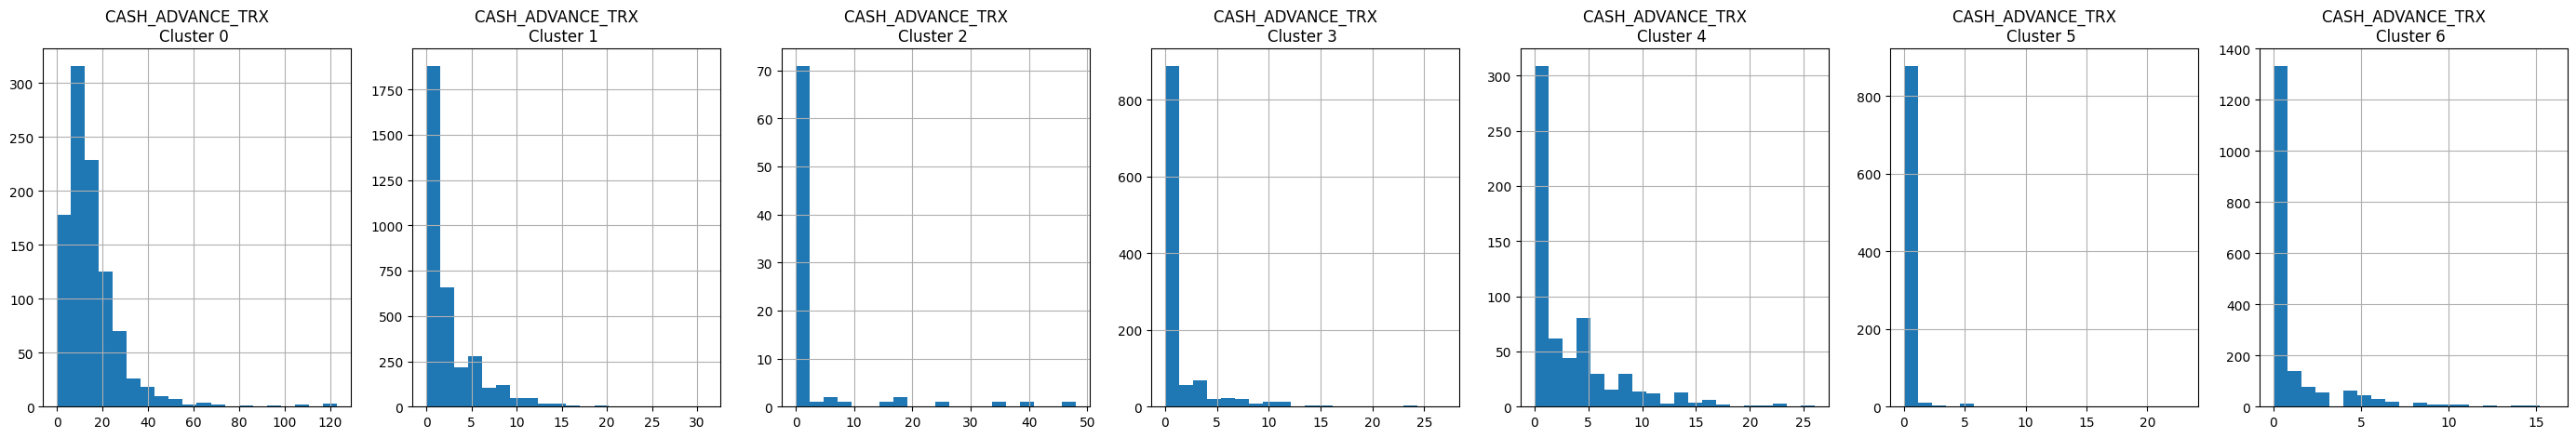

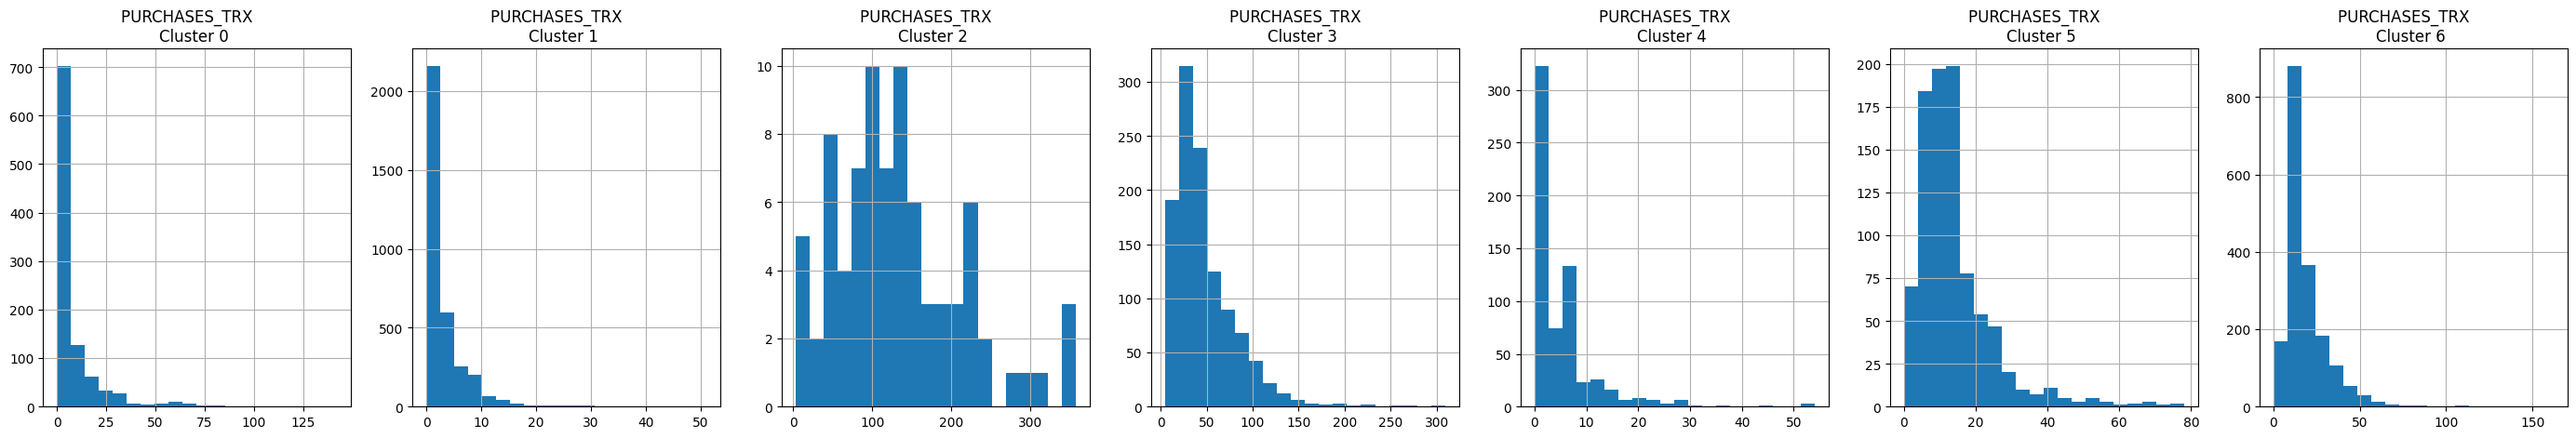

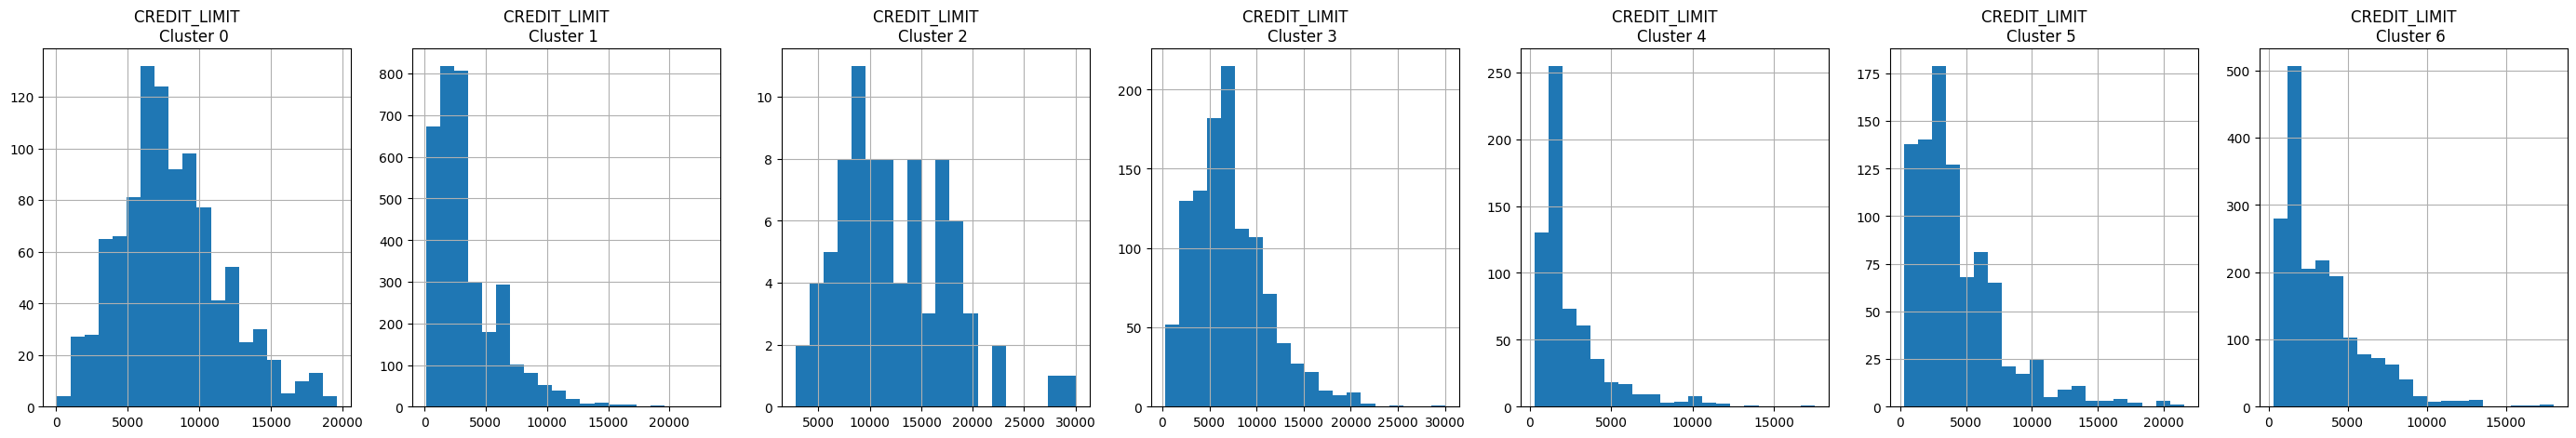

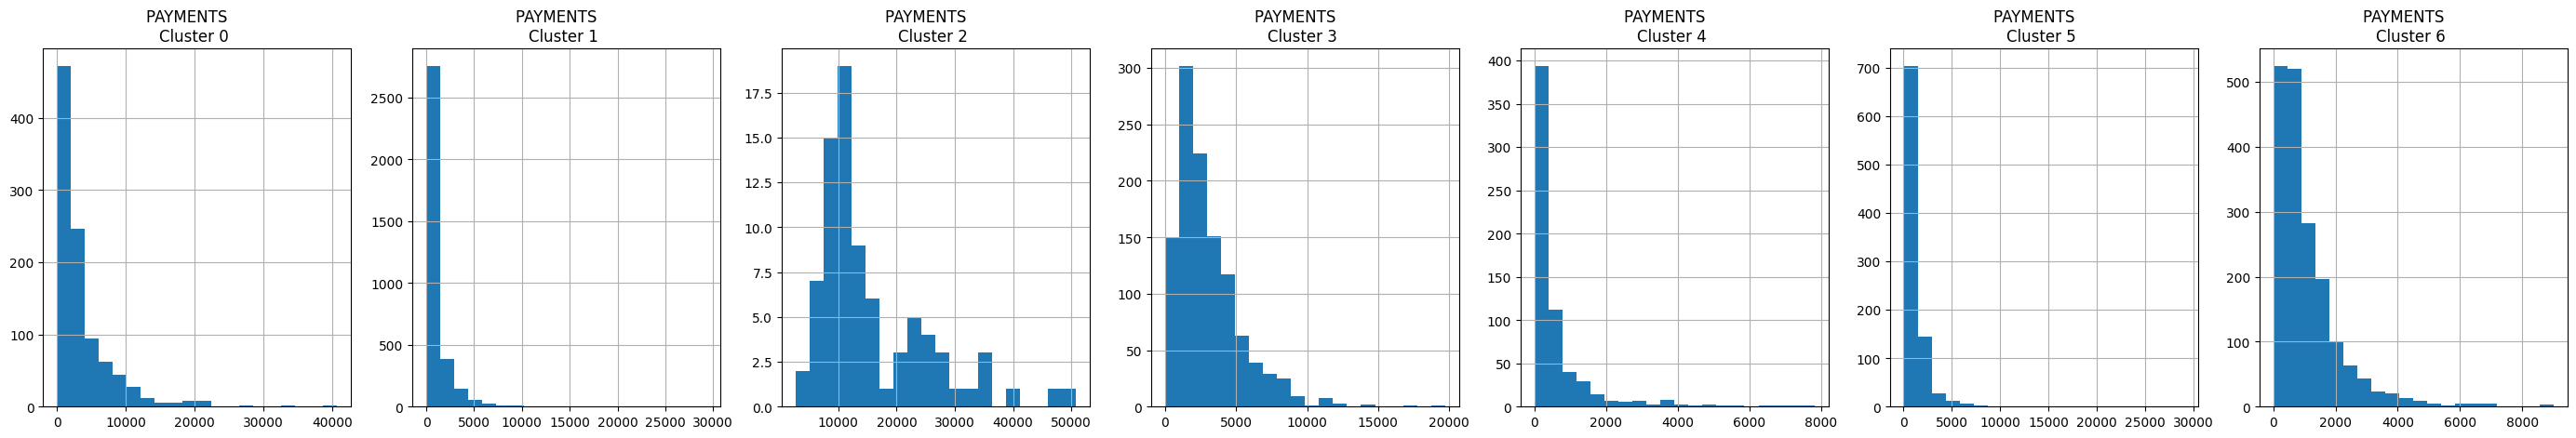

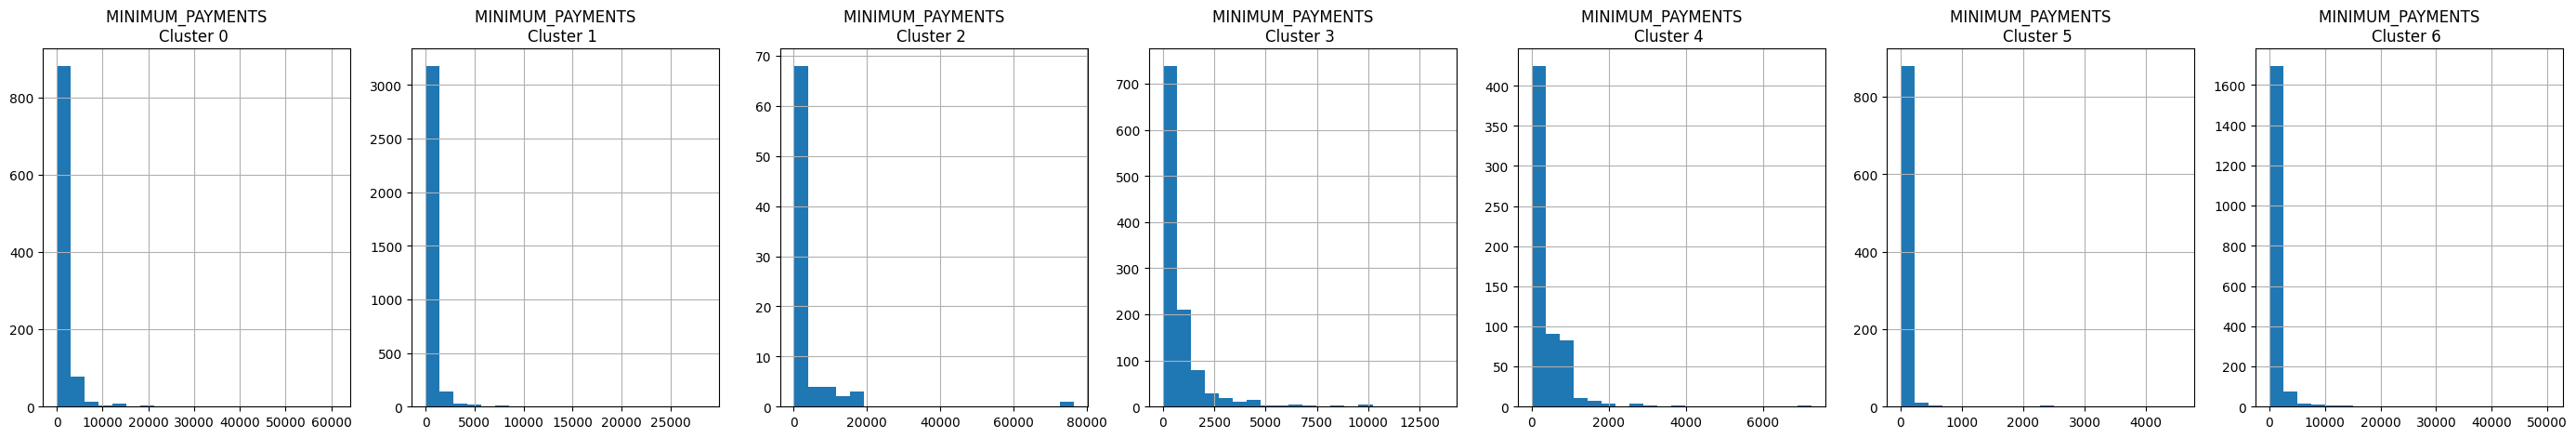

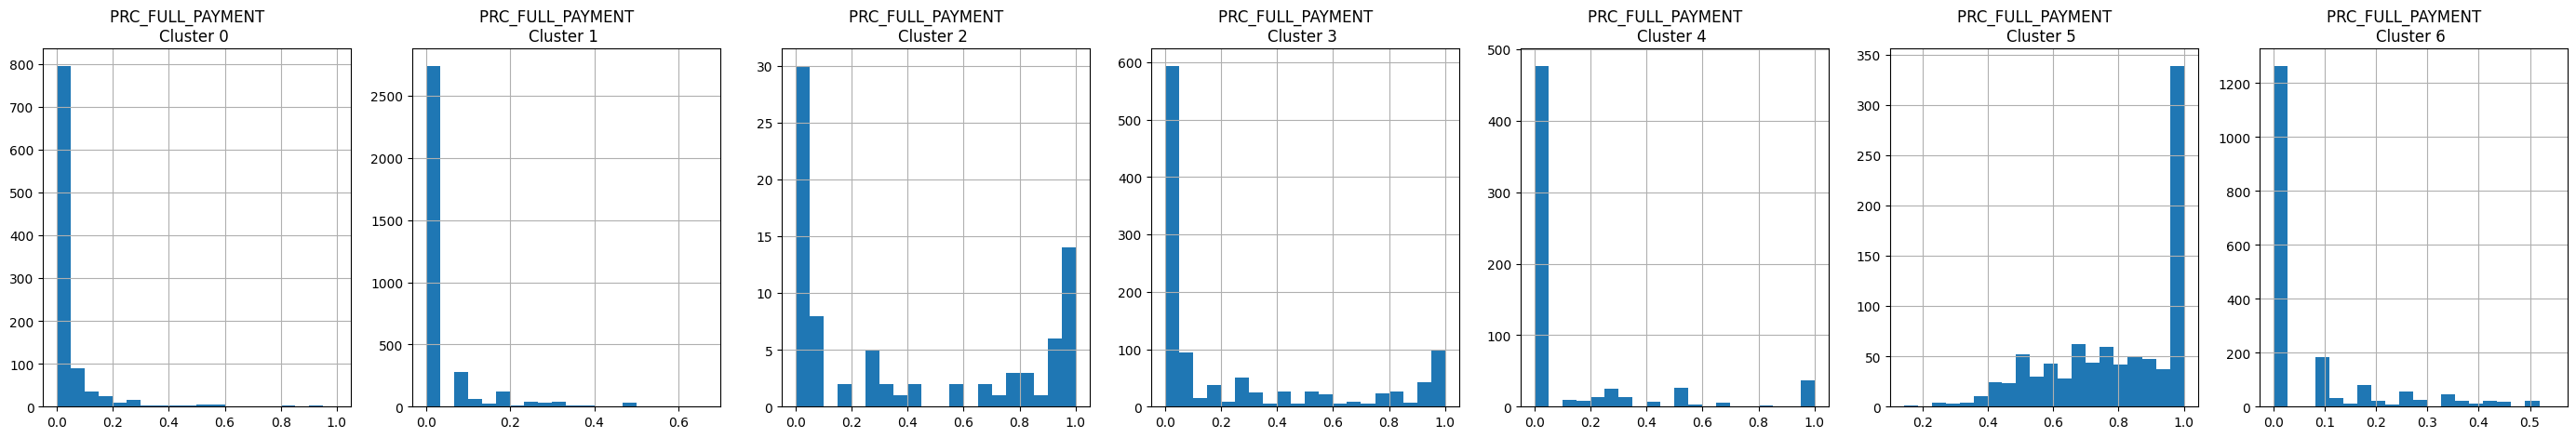

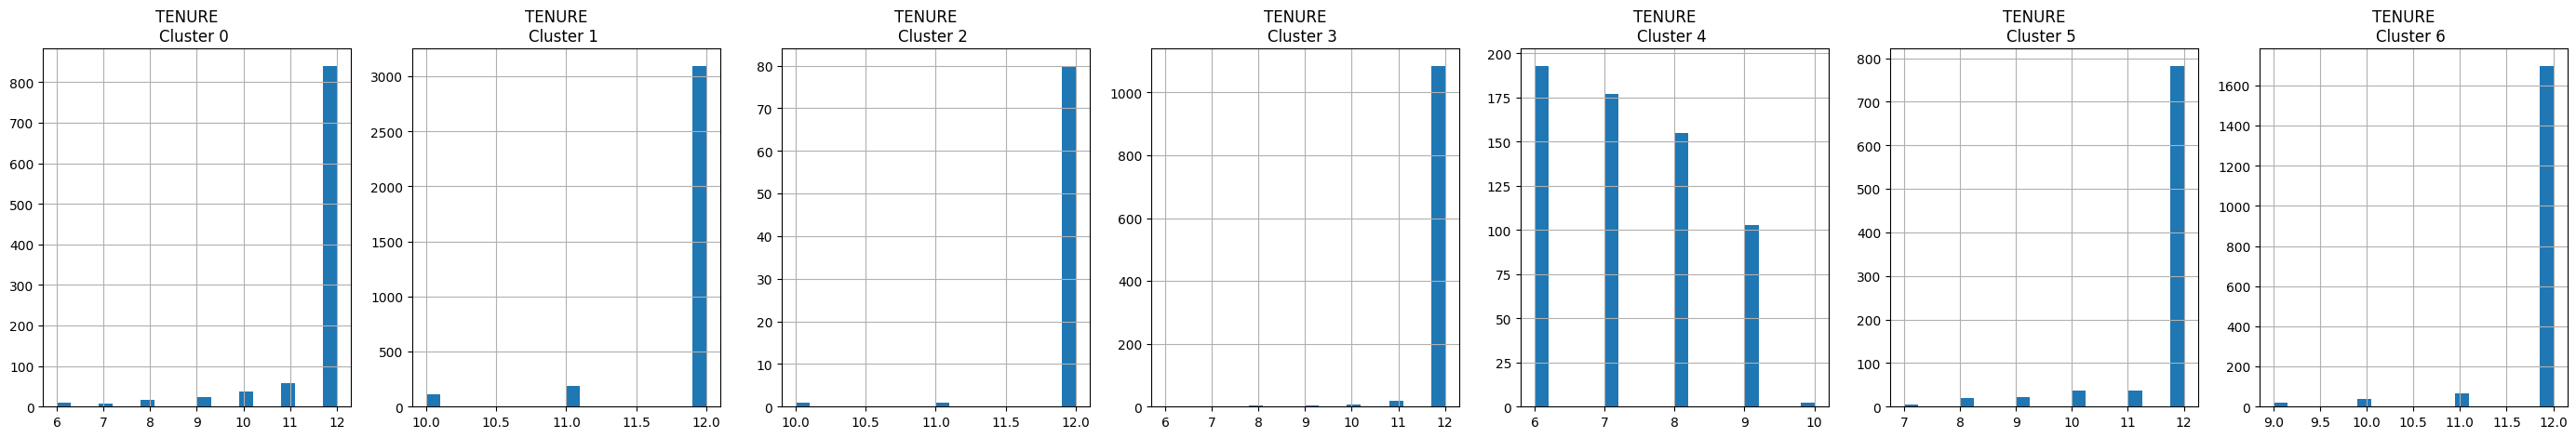

In [59]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



 Reduce data to 2 principal components for visualization
 Question: Why use PCA?
 Answer: 
 1. Original dataset has 16+ features → cannot visualize directly.  
 2. PCA reduces dimensions while retaining **most variance**.  
 3. PCA creates **linear combinations of features**, keeping the data interpretable.  
 4. Alternative visualization like t-SNE/UMAP is slower and less interpretable. 

5. DIMENSIONALITY REDUCTION & VISUALIZATION

In [62]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [63]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


 Add cluster labels for coloring in plot
 Question: Why combine PCA with cluster labels?
 Answer: To visualize **how clusters are separated** in 2D PCA space.

In [65]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,0
2,0.969684,-0.383520,3
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1


 Plot clusters in 2D PCA space
 Question: Why scatterplot with clusters in PCA space?
 Answer: PCA reduces data to 2D for visualization. Scatterplot shows **cluster separation visually**.

PCA does not create clusters; it only helps visualize clusters found by K-Means.

Each color shows a cluster. Well-separated colors mean clusters are distinct.

This visualization helps validate clustering results and understand customer segmentation.

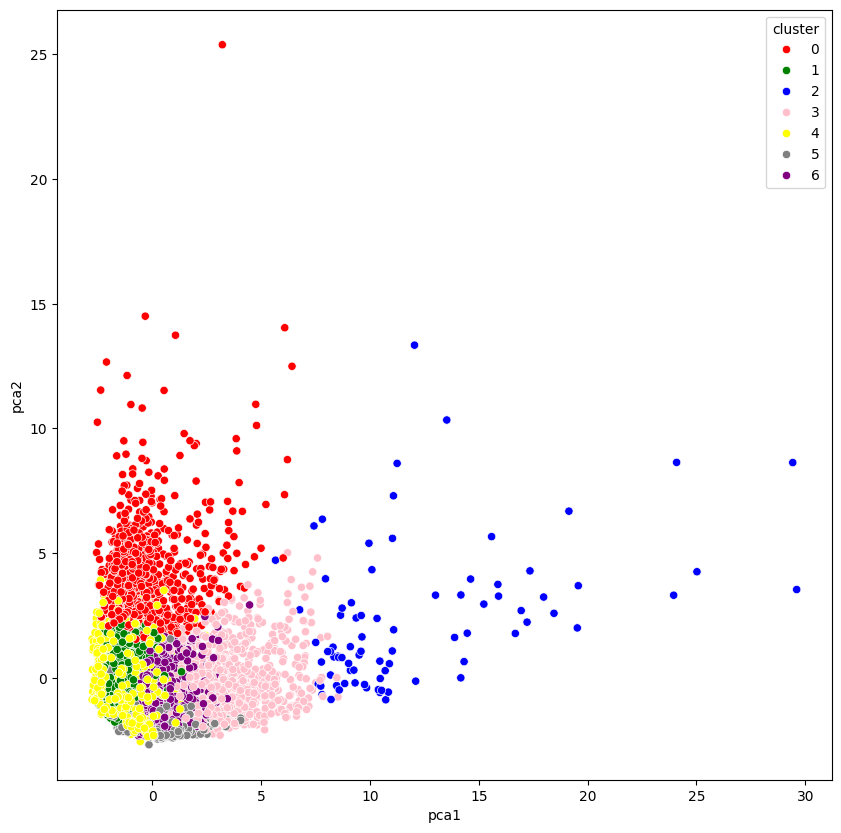

In [68]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

Cluster Distribution

Green Cluster (Cluster 1) → Top-left, slightly spread out
This could represent customers with high cash advance and moderate balance (Revolvers).
Slightly high on PCA2 → indicates higher cash advance or risk factor.

Blue Cluster (Cluster 2) → Right side, spread out
Represents VIP or high-balance customers.
High on PCA1 → mostly high credit limit and high purchases.

Pink Cluster (Cluster 3) → Center, left of Blue
Average customers who have moderate balance and make moderate purchases.

Red Cluster (Cluster 0) → Bottom-center
Transactors: Low balance, low cash advance, high full payment percentage.

Purple Cluster (Cluster 6) → Bottom-left
Customers with low tenure, low balance, mostly new users.

Yellow Cluster (Cluster 4) → Bottom-left corner, slightly dense
Low activity customers, almost no purchases.

Gray Cluster (Cluster 5) → Overlaps with purple/red
Possibly a small cluster with niche behavior, e.g., extreme low balance or rare spending patterns.

In [70]:
# Step 1: Summarize clusters - calculate mean of each feature per cluster
cluster_summary = creditcard_df_cluster.groupby('cluster').mean()
print("Cluster Summary (Mean values):")
print(cluster_summary)


Cluster Summary (Mean values):
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0        4887.379374           0.972481    504.942435        309.770845   
1        1173.564870           0.829130    268.994522        223.805358   
2        4501.309782           0.975499  16124.096585      10943.910122   
3        2049.728114           0.984512   3239.616201       2223.732144   
4         863.606315           0.768296    380.027619        250.496714   
5          83.678007           0.782201    838.413049        252.512373   
6        1024.076553           0.929280    880.738929        248.039978   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    195.273873   4876.762673             0.283206   
1                     45.348828    636.937306             0.154514   
2            

In [71]:
# Step 2: Count number of customers in each cluster
cluster_counts = creditcard_df_cluster['cluster'].value_counts().sort_index()
print("\nNumber of customers per cluster:")
print(cluster_counts)


Number of customers per cluster:
cluster
0     994
1    3397
2      82
3    1124
4     630
5     902
6    1821
Name: count, dtype: int64


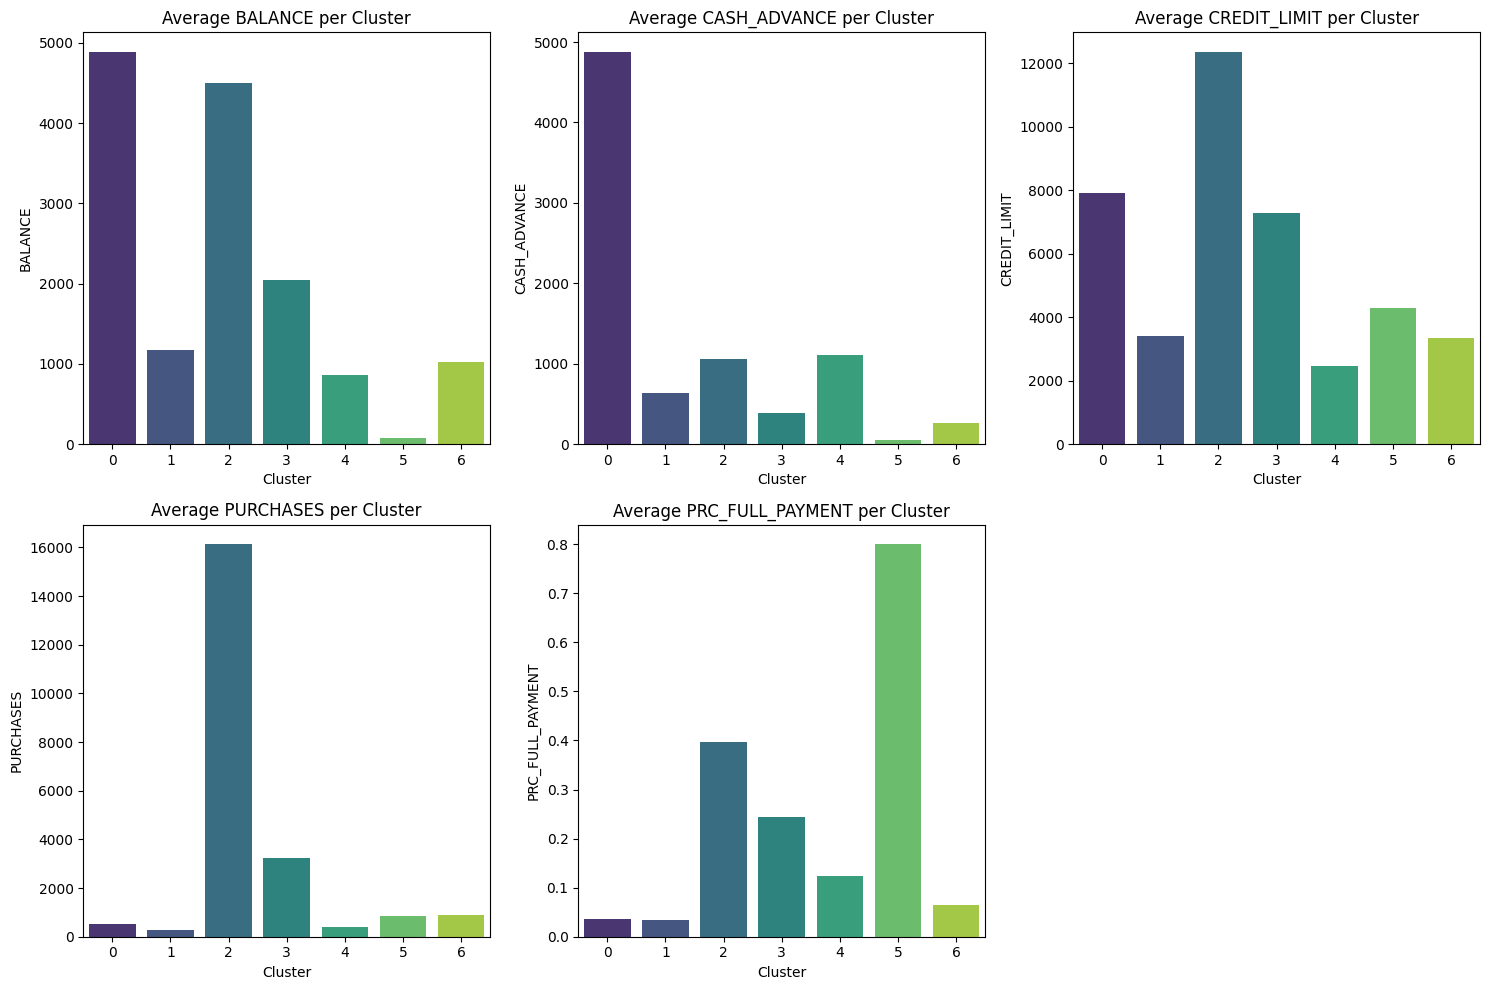

In [72]:
# Step 3: Bar plots - compare key features across clusters
features_to_plot = ['BALANCE', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PURCHASES', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2,3,i+1)
    sns.barplot(x=cluster_summary.index, y=cluster_summary[feature], palette='viridis')
    plt.title(f'Average {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


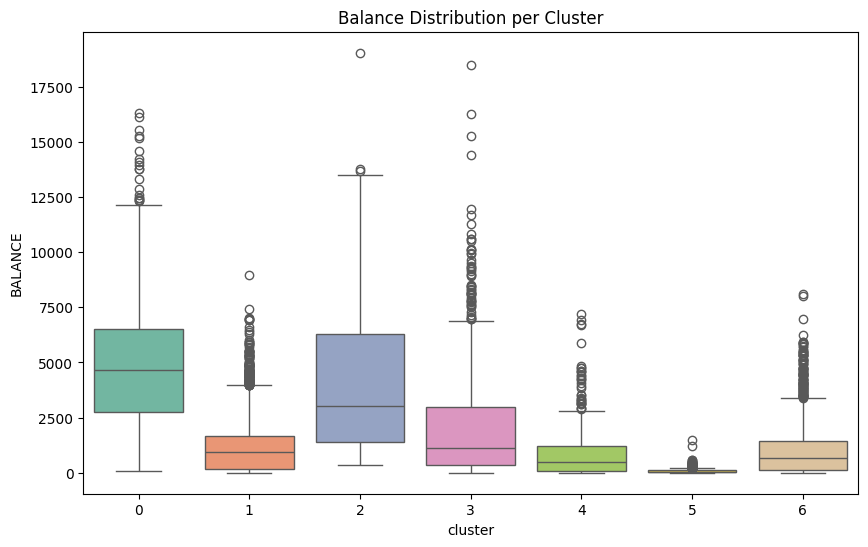

In [73]:
# Step 4: Boxplot example - see distribution of BALANCE per cluster
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='BALANCE', data=creditcard_df_cluster, palette='Set2')
plt.title('Balance Distribution per Cluster')
plt.show()

6. EXPORT RESULTS

Saved the dataset with cluster labels for reporting or further analysis

Manual input mode selected

Predicted Result:
   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     1500                0.9       2000               800   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    1200             0                 0.85   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.4                              0.65   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0             30         10000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      2200               250               0.7      12        0  

📊 CUSTOMER SEGMENT ANALYSIS
--------------------------------
Predicted Cluster Number: 0
Customer Type:
🔴 Red Cluster (Cluster 0): Transactors – Low balance, low cash advance, high full payment users


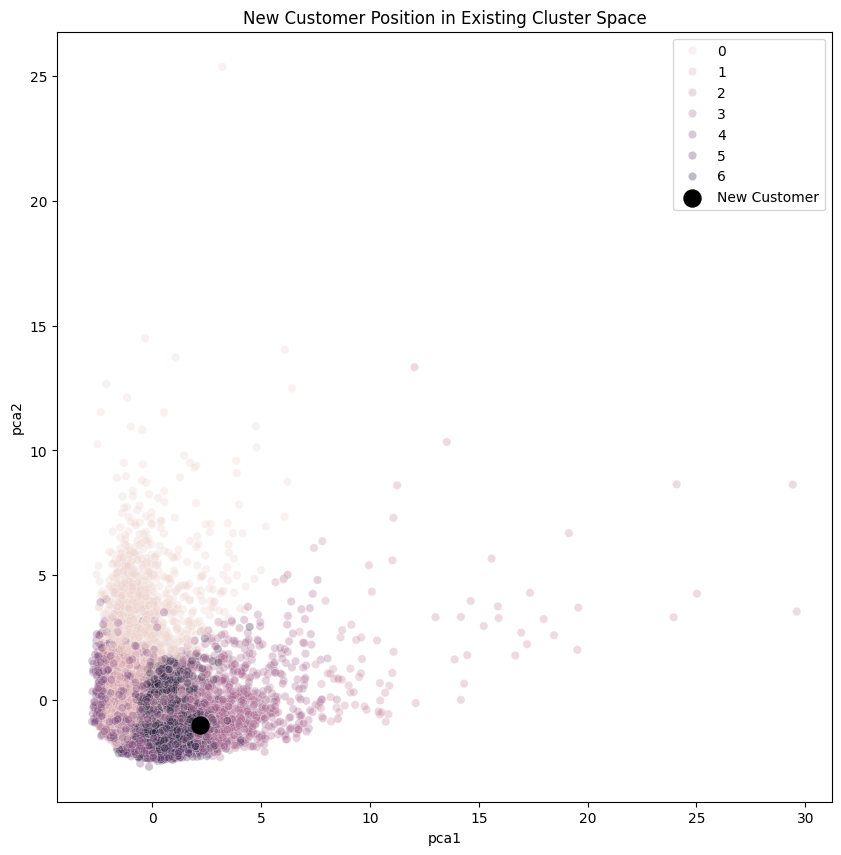

In [87]:

# UNIFIED INPUT HANDLER FOR NEW DATA
# Works for both Manual Input & CSV Input


# INPUT_MODE decides how data will be taken
# "manual" → single customer data entered manually
# "csv"    → multiple customers loaded from CSV file
INPUT_MODE = "manual"        # Change to "csv" for CSV input
CSV_PATH = "new_customers.csv"



# FUNCTION 1: GET NEW CUSTOMER DATA

def get_new_customer_data(input_mode="manual"):
    """
    WHY THIS FUNCTION?
    ------------------
    We want to provide data to the same model in two ways:
    1️⃣ Manual input (single customer)
    2️⃣ CSV input (multiple customers)

    This function always returns data in DataFrame format
    so that the next steps remain the SAME.
    """

    if input_mode == "manual":
        print("Manual input mode selected")

        # Manually entered new customer data
        # (Features must be the same as training data)
        data = {
            'BALANCE': 1500,
            'BALANCE_FREQUENCY': 0.90,
            'PURCHASES': 2000,
            'ONEOFF_PURCHASES': 800,
            'INSTALLMENTS_PURCHASES': 1200,
            'CASH_ADVANCE': 0,
            'PURCHASES_FREQUENCY': 0.85,
            'ONEOFF_PURCHASES_FREQUENCY': 0.40,
            'PURCHASES_INSTALLMENTS_FREQUENCY': 0.65,
            'CASH_ADVANCE_FREQUENCY': 0,
            'CASH_ADVANCE_TRX': 0,
            'PURCHASES_TRX': 30,
            'CREDIT_LIMIT': 10000,
            'PAYMENTS': 2200,
            'MINIMUM_PAYMENTS': 250,
            'PRC_FULL_PAYMENT': 0.70,
            'TENURE': 12
        }

        # Convert dictionary → DataFrame
        return pd.DataFrame([data])

    elif input_mode == "csv":
        print("CSV input mode selected")

        # Load multiple customers from CSV file
        return pd.read_csv(CSV_PATH)

    else:
        raise ValueError("Invalid INPUT_MODE. Use 'manual' or 'csv'.")



# FUNCTION 2: CLUSTER PREDICTION

def predict_cluster_for_new_data(new_data):
    """
    WHY THIS FUNCTION?
    ------------------
    The preprocessing done during training:
    - Missing value handling
    - Scaling
    - KMeans prediction

    The SAME steps must be repeated on new data,
    otherwise the model will give incorrect clusters.
    """

    data = new_data.copy()

    # CUST_ID is not useful for clustering
    if 'CUST_ID' in data.columns:
        data.drop('CUST_ID', axis=1, inplace=True)

    # Fill missing values using training dataset mean
    data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(
        creditcard_df['MINIMUM_PAYMENTS'].mean()
    )

    data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(
        creditcard_df['CREDIT_LIMIT'].mean()
    )

    # IMPORTANT:
    # Use the SAME scaler that was fitted during training
    data_scaled = scaler.transform(data)

    # Predict cluster using trained KMeans model
    data['cluster'] = kmeans.predict(data_scaled)

    return data


# CLUSTER INTERPRETATION (BUSINESS MEANING)

cluster_meaning = {
    0: "🔴 Red Cluster (Cluster 0): Transactors – Low balance, low cash advance, high full payment users",
    1: "🟢 Green Cluster (Cluster 1): Revolvers – High cash advance, moderate balance, risky users",
    2: "🔵 Blue Cluster (Cluster 2): VIP Customers – High balance, high credit limit, high purchases",
    3: "🌸 Pink Cluster (Cluster 3): Average Customers – Moderate balance & spending",
    4: "🟡 Yellow Cluster (Cluster 4): Low Activity Users – Almost no purchases",
    5: "⚫ Gray Cluster (Cluster 5): Niche Users – Rare or extreme spending behavior",
    6: "🟣 Purple Cluster (Cluster 6): New Users – Low tenure, low balance"
}



# RUN PREDICTION


# Step 1: Take input (manual or csv)
new_customer_data = get_new_customer_data(INPUT_MODE)

# Step 2: Predict cluster
prediction_result = predict_cluster_for_new_data(new_customer_data)

print("\nPredicted Result:")
print(prediction_result)



# SHOW CLUSTER TYPE (ONLY FOR MANUAL INPUT)

if INPUT_MODE == "manual":
    predicted_cluster = prediction_result['cluster'].iloc[0]

    print("\n📊 CUSTOMER SEGMENT ANALYSIS")
    print("--------------------------------")
    print(f"Predicted Cluster Number: {predicted_cluster}")
    print("Customer Type:")
    print(cluster_meaning[predicted_cluster])



# OPTIONAL: PCA VISUALIZATION

# PCA is used only for visualization
# Model prediction does NOT depend on PCA

new_pca = pca.transform(scaler.transform(new_customer_data))

plt.figure(figsize=(10,10))

# Existing clustered customers
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='cluster',
    data=pca_df,
    alpha=0.3
)

# New customer plotted in black
plt.scatter(
    new_pca[:,0],
    new_pca[:,1],
    color='black',
    s=150,
    label='New Customer'
)

plt.legend()
plt.title("New Customer Position in Existing Cluster Space")
plt.show()


In [ ]:
# Save clustered dataset
creditcard_df_cluster.to_csv('clustered_customers.csv', index=False)
